In [ ]:
# Description: This program predicts the price of Bitcoin for the next 60 days

In [3]:
#Import the libraries
!pip install -U pandas
!pip install -U pandas_datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Load the data
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

data = web.DataReader(
    f'{crypto_currency}-{against_currency}',
    'yahoo',
    start,
    end
)

In [5]:
#Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [6]:
#Prepare data
prediction_days = 60
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x])
  y_train.append(scaled_data[x, 0])

In [7]:
#Reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
#Create the Neural Network
model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(x_train.shape[1], 1)
))
model.add(Dropout(0.2)) # prevent overfitting
model.add(LSTM(
    units=50,
    return_sequences=True
))
model.add(Dropout(0.2)) # prevent overfitting
model.add(LSTM(
    units=50
))
model.add(Dropout(0.2)) # prevent overfitting
model.add(Dense(units=1)) # final value

In [13]:
#Train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
72/72 [==============================] - 14s 104ms/step - loss: 0.0069
Epoch 2/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0030
Epoch 3/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0025
Epoch 4/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0027
Epoch 5/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0024
Epoch 6/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0020
Epoch 7/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0021
Epoch 8/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0017
Epoch 9/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0018
Epoch 10/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0017
Epoch 11/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0017
Epoch 12/25
72/72 [==============================] - 7s 92ms/step - loss: 0.0016
Epoch 13/25
72/72 [================

In [53]:
#Load test data
test_start = dt.datetime(2020,1,1) + dt.timedelta(days=-prediction_days)
test_end = dt.datetime.now()

test_data = web.DataReader(
    f'{crypto_currency}-{against_currency}',
    'yahoo',
    test_start,
    test_end
)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [54]:
#Prepare the test model data
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [55]:
#Prepare the test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [56]:
#Predict the prices
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

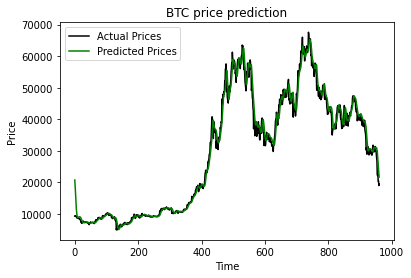

In [57]:
#Plot the resutls
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f"{crypto_currency} price prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [58]:
#Predict Next Day

In [59]:
#Create a model
real_data = [model_inputs[-prediction_days:, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [60]:
#Prediction
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[20778.168]]
